## Information and Consumption Smoothing

This notebook describes two consumers who have exactly the same nonfinancial income process and who both conform to the linear quadratic permanent
income of consumption smoothing model described in the quantecon lecture https://python.quantecon.org/perm_income_cons.html

The consumers differ only in having different information about their future nonfinancial incomes

One consumer each period receives **news** in the form of a shock that changes today's income and also contains exact  information about an altered  present value of future nonfinancial income.

The other, less well informed, consumer each period receives a shock consisting of the part of today's nonfinancial income that could not be forecasts from the all past values of nonfinancial income. 

Even though they receive exactly the same nonfinancial incomes each period, our two consumers respond to time $t$ shocks differently.

The do this because, while they receive exactly the same histories of nonfinancial income, they receive different **shocks** or **news** about their **future** nonfinancial incomes.

We compare behaviors of our two consumers as a way to learn about 

* operating characteristics of the linear-quadratic permanent income model, and

* how the Kalman filter introduced in this lecture https://python.quantecon.org/kalman.html and/or the theory of optimal forecasting introduced in this lecture https://python.quantecon.org/classical_filtering.html embody lessons that can be applied to the  **news** and **noise** literature

* various ways of representing and computing optimal decision rules in  the linear-quadratic permanent income model

* a **Ricardian equivalence** outcome  describing effects on optimal consumption of a  tax cut at time $t$ accompanied by a foreseen permanent increases in taxes just sufficient to finance the interest payments used to service risk-free government bonds issued to finance the tax cut

* a simple application of alternative ways to factor a covariance generating function along lines described in this lecture https://python.quantecon.org/classical_filtering.html

### Two representations of the **same** nonfinancial income process



Where $\beta \in (0,1)$, we  study consequences  of endowing a consumer with one of the two alternative representations for the change in the consumer's  nonfinancial income $y_{t+1} -  y_t$.

We'll call the  **original representation**.

It is 

$$ y_{t+1} - y_t  =  \epsilon_{t+1} - \beta^{-1}  \epsilon_t  \quad (1) $$

where $\{\epsilon_t\}$ is an  i.i.d. normally distributed scalar process with means of zero
and variances $\sigma_\epsilon^2 $ 

This representation of the process is used by a consumer who at time $t$ knows both $y_t$ and the original shock $\epsilon_t$ and can use
both of them to forecast future $y_{t+j}$'s

The second representation (of the **same** $\{y_t\}$ process) is 


$$ y_{t+1} - y_t =  a_{t+1} - \beta  a_t \quad (2) $$
               
where $\{a_t\}$ is another  i.i.d. normally distributed scalar process, with  means of zero
and now  variances $\sigma_a^2$.  

The two i.i.d. shock variances are related by 

$$ \sigma_a^2 = \beta^{-2} \sigma_\epsilon^2 >  \sigma_\epsilon^2  $$

so that the variance of the innovation exceeds the variance of the original shock by a multiplicative factor $\beta^{-2}$.  

The second representation is  the **innovations representation** from Kalman filtering theory.

To see how this works,  note that equating the two representations (1) and (2) for $y_{t+1} - y_t$
implies $\epsilon_{t+1} - \beta^{-1} \epsilon_t = a_{t+1} - \beta a_t$, which in turn implies

$$ a_{t+1} = \beta a_t + \epsilon_{t+1} - \beta^{-1} \epsilon_t . $$

Solving this difference equation backwards for $a_{t+1}$ gives, after a few lines of algebra,

$$ a_{t+1} = \epsilon_{t+1} + (\beta - \beta^{-1}) \sum_{j=0}^\infty \beta^j \epsilon_{t-j} \quad (3) $$

which  we can also write as 

$$ a_{t+1} = \sum_{j=0}^\infty \epsilon_{t+1 -j} \equiv h(L) \epsilon_{t+1}  $$

where $L$ is the one-period lag operator, $I$ is the identity operator, and 

$$ h(L) = \frac{ I -\beta^{-1} L}{ I - \beta L} $$

Let $c_j \equiv E z_t z_{t-j}$ be the $j$th  autocovariance of  the $\{y_t - y_{t-1}\}$ process.


Using calculations in the quantecon lecture  https://python.quantecon.org/classical_filtering.html, where $z \in C$ is a complex variable, the covariance generating function $g (z) = \sum_{j=\infty}^\infty c_j z^j $ of the $\{y_t -_y_{t-1}\}$ process equals

$$ g(z) = \sigma_\epsilon^2  h(z) h(z^{-1}) = \beta^{-2} \sigma_\epsilon^2 > \sigma_\epsilon^2 $$

which verifies that $\{a_t\}$ is a **serially uncorrelated** process with variance 


$$ \sigma_a^2 = \beta^{-1} \sigma_\epsilon^2 .$$

To verify these claims, just notice that $g(z) = \beta^{-2} \sigma_\epsilon^2$ implies that the coefficient 
$g_0 = \beta^{-2} \sigma_\epsilon^2$ and that $g_j = 0 $ for $j \neq 0$. 

Alternatively, if you are uncomfortable with covariance generating functions, note that we can directly calculate $\sigma_a^2$ from
formula (3) according to

$$
\sigma_a^2 = \sigma_\epsilon^2 + [ 1 + (\beta - \beta^{-1})^2 \sum_{j=0}^\infty \beta^{2j} ] = \beta^{-1} \sigma_\epsilon^2 .
$$




## Application of Kalman filter

We can also  obtain representation (2) from representation (1) by using the **Kalman filter**.

Thus, from equations associated with the **Kalman filter**, it can be verified that  the steady-state Kalman gain $K = \beta^2$ and the steady state conditional covariance $\Sigma = E [(\epsilon_t - \hat \epsilon_t)^2 | y_{t-1}, y_{t-2}, \ldots ] = (1 - \beta^2) \sigma_\epsilon^2$. 

In a little more detail, let $z_t = y_t - y_{t-1} $ and form the state-space representation

\begin{align} \epsilon_{t+1} & = 0 \epsilon_t +  \epsilon_{t+1} \cr
               z_{t+1} & = - \beta^{-1} \epsilon_t + \epsilon_{t+1} \end{align}

and assume that $\sigma_\epsilon = 1$ for convenience

Compute the steady-state Kalman filter for this system and let $K$ be the steady-state gain and $a_{t+1}$ the one-step ahead
innovation

The innovations representation is 

\begin{align} \hat \epsilon_{t+1} & = 0 \hat \epsilon_t + K a_{t+1} \cr
               z_{t+1} & = - \beta^{-1} a_t + a_{t+1} \end{align} 
               
By applying formulas for the steady-state Kalman filter, by hand we computed that $K = \beta^2, \sigma_a^2 = \beta^{-2} \sigma_\epsilon^2 = \beta^{-2},$ and $\Sigma = (1-\beta^2) \sigma_\epsilon$    

We can also obtain these formulas via the classical filtering theory described in this lecture https://python.quantecon.org/classical_filtering.html  

## News shocks and less informative shocks

Representation (1) is cast  in terms of a **news shock** $\epsilon_{t+1}$ that represents a shock 
to nonfinancial income coming from taxes, transfers, and other random sources of income changes known to a well-informed person having all sorts of information about the income process. 

Representation (2) for the **same** income process is driven by shocks $a_t$ that contain less information than the news shock $\epsilon_t$

Representation (2) is called the **innovations** representation for the $\{y_t - y_{t-1}\}$ process.  

It is cast in terms of what time series statisticians call the **innovation** or  **fundamental** shock that emerges from applying the theory of  optimally predicting  nonfinancial income based solely on the information contained solely in  **past** levels of growth in 
nonfinancial income. 

**Fundamental for the $\{y_t\}$ process** means that the shock $a_t$ can be expressed as a square-summable linear combination
of $y_t, y_{t-1}, \ldots$.  

The shock $\epsilon_t$ is **not fundamental** and has more information about the future of the $\{y_t - y_{t-1}\}$ process than is contained in $a_t$. 

Representation (3) reveals the important fact that  the **original shock** $\epsilon_t$ contains more information about future $y$'s than is contained in the semi-infinite history $y^t = [y_t, y_{t-1}, \ldots ]$ of current and past $y$'s. 

Staring at representation (3) for $a_{t+1}$ shows that it consists both of **new news** $\epsilon_{t+1}$ as well as a long  moving average
$ (\beta - \beta^{-1}) \sum_{j=0}^\infty \beta^j \epsilon_{t-j} $ of **old news**.


The **better informed** representation (1) asserts that  a shock $\epsilon_{t}$ results in an impulse response to nonfinancial income of  $\epsilon_t$ times the sequence 

$$ 1, 1- \beta^{-1}, 1- \beta^{-1}, \ldots $$

so that a shock  that **increases** nonfinancial income $y_t$ by $\epsilon_t$ at time $t$  is followed by 
an **increase** in future $y$ of $\epsilon_t$ times  $1 - \beta^{-1} < 0$ in **all** subsequent periods.  

Because $1 - \beta^{-1} < 0$, this means that a positive shock of $\epsilon_t$ today raises income at time $t$ by $\epsilon_t$ 
and then **decreases all** future incomes by $(\beta^{-1} -1)\epsilon_t$.

This pattern precisely describes the following mental experiment:

* The consumer receives a government transfer of $\epsilon_t$ at time $t$.

* The government finances the transfer by issuing a one-period bond on which it pays a gross one-period risk-free interest rate equal to $\beta^{-1}$

* In each future period, the government **rolls over** the one-period bond  and so continues to borrow $\epsilon_t$ forever

* The government imposes a lump sum tax on the consumer in order to pay just the current interest on the original bond and its successors created by the roll-over operation

* In all  future periods $t+1, t+2, \ldots$, the  government levies a lump-sum tax on the consumer of $\beta^{-1} -1$ that is just enough to pay the interest on the bond.  

The **present value** of the impulse response or moving average coefficients equals
$d_\epsilon(L) = \frac{0}{1 -\beta } =0 $, a fact that we'll see again below.


Representation (2), i.e., the innovation representation, asserts that  a shock $a_{t}$  results in an impulse response
to nonfinancial income of $a_t$ times

$$ 1, 1 -\beta, 1 - \beta, \ldots $$

so that a shock that increases income $y_t$ by $a_t$ at time $t$  can be expected to be followed by an
**increase** in $y_{t+j} $ of $a_t$ times $1 - \beta > 0$ in all future periods $j=1, 2, \ldots $.


The present value of the impulse response or moving average coefficients for representation (2) is 
$d_a(L) = \frac{1 -\beta^2}{1 -\beta } = (1 + \beta)$, another fact that will be important below.




## Representation of $\epsilon_t$ in terms of future $y$'s


Notice that reprentation (1), namely, $y_{t+1} - y_t = - \beta^{-1} \epsilon_t + \epsilon_{t+1} $
implies the linear difference equation

$$ \epsilon_t = \beta \epsilon_{t+1} - \beta (y_{t+1} - y_t ). $$

Solving forward we eventually obtain

$$ \epsilon_t = \beta ( y_t - (1-\beta) \sum_{j=0}^\infty \beta^j y_{t+j+ 1} ) $$

This equation shows that $\epsilon_t $ equals $\beta$ times the one-step-backwards error
in optimally **backcasting**  $y_t$ based on the **future** $y^t_+ \equiv y_{t+1}, y_{t+2}, \ldots ] $ 
via the optimal backcasting formula

$$ E [ y_t | y^t_+] = (1-\beta) \sum_{j=0}^\infty \beta^j y_{t+j+ 1} $$

Thus, $\epsilon_t$ contains **exact** information about an important linear combination of **future** nonfinancial income


## Representation in terms of $a_t$ shocks


Next notice that representation (2), namely,   $y_{t+1} - y_t = - \beta a_t + a_{t+1} $
iimplies the linear difference equation

$$ a_{t+1} = \beta a_t + (y_{t+1} - y_t) $$

Solving this equation backwards establishes that
the one-step-prediction error $a_{t+1} $ is

$$ a_{t+1} = y_{t+1} - (1-\beta) \sum_{j=0}^\infty \beta^j y_{t-j}  $$

and where the information set is $y^t = [y_t, y_{t-1}, \ldots ]$, the one step-ahead optimal prediction is  

$$ E [ y_{t+1} | y^t ] = (1-\beta) \sum_{j=0}^\infty \beta^j y_{t-j}  $$



## Permanent income consumption-smoothing model


When we computed  optimal consumption-saving policies for the two representations using formulas obtained with the difference equation approach described  in the quantecon lecture https://python.quantecon.org/perm_income_cons.html,
we obtain: 

**for a consumer having the information assumed in the news representation (1):**

\begin{align}   
c_{t+1} - c_t & = 0 \cr
b_{t+1} - b_t &  = - \beta^{-1} \epsilon_t 
\end{align}

**for a consumer having the more limited information associated with the innovations representation:**

\begin{align}
c_{t+1} - c_t & = (1-\beta^2) a_{t+1} \cr
b_{t+1} - b_t & = - \beta a_t 
\end{align}



These formulas agree with outcomes from the Python programs to be reported below using state-space representations and dynamic programmings

Evidently the two consumers behave differently though they receive exactly the same histories of nonfinancial income.

The consumer with information associated with representation (1) responds to each shock $\epsilon_{t+1}$ by leaving his consumption unaltered
and **saving** all of $a_{t+1}$ in anticipation of the permanently increased taxes that he will bear to pay for the addition $a_{t+1}$ to his
time $t+1$ nonfinancial income.

The consumer with information associated with representation (2) responds to a shock $a_{t+1}$ by increasing his consumption by what 
he perceives to be the **permanent** part of the increase in consumption and by increasing his **saving** by what he perceives to be the temporary part.  

Do you think it is appropriate to  regard the first consumer as someone whose behavior sharply illustrates the behavior assumed in a classic Ricardian equivalence experiment?





#### State space representations

We can cast our  two representations in terms of the following two state space systems



\begin{align}  \begin{bmatrix} y_{t+1} \cr \epsilon_{t+1} \end{bmatrix}  &= 
          \begin{bmatrix} 1 & - \beta^{-1} \cr 0 & 0 \end{bmatrix} \begin{bmatrix} y_t \cr \epsilon_t \end{bmatrix}
           + \begin{bmatrix} \sigma_\epsilon \cr \sigma_\epsilon \end{bmatrix} 
           v_{t+1} \cr
 y_t & =  \begin{bmatrix} 1 & 0 \end{bmatrix}    \begin{bmatrix} y_t \cr \epsilon_t \end{bmatrix} \end{align}
        
and



\begin{align}  \begin{bmatrix} y_{t+1} \cr a_{t+1} \end{bmatrix}  &= 
          \begin{bmatrix} 1 & - \beta \cr 0 & 0 \end{bmatrix} \begin{bmatrix} y_t \cr a_t \end{bmatrix}
           + \begin{bmatrix} \sigma_a \cr \sigma_a \end{bmatrix} 
           u_{t+1} \cr
 y_t & =  \begin{bmatrix} 1 & 0 \end{bmatrix}    \begin{bmatrix} y_t \cr a_t \end{bmatrix} \end{align}
 
where $\{v_t\}$ and $\{u_t\}$ are both  i.i.d. sequences of univariate standardized normal random variables.  
 
These two alternative income processes are ready to be used in the framework presented in the section "Comparison with the Difference Equation Approach" in the quantecon lecture: https://python.quantecon.org/perm_income_cons.html
 
All the code that we shall use below is  presented in that lecture.  


 
 
        

## Computations

We shall use Python to  form **both** of the above two state-space representations, using the following parameter values
$\sigma_\epsilon = 1, \sigma_a = \beta^{-1} \sigma_\epsilon = \beta^{-1}$ where $\beta$ is the **same** value
as the discount factor in the household's problem in the LQ savings problem in the lecture https://python.quantecon.org/perm_income_cons.html

For these two representations, we  use the code in the https://python.quantecon.org/perm_income_cons.html
lecture to 

* compute optimal decision rules for $c_t, b_t$ for the two types of consumers associated with our  two representations of nonfinancial income

* use the value function objects $P, d$ returned by the code to compute optimal values for the two representations when evaluated at the following  initial conditions $x_0 = \begin{bmatrix} 10 \cr 0 \end{bmatrix} $ for each representation. 

* create instances of the [LinearStateSpace](https://github.com/QuantEcon/QuantEcon.py/blob/master/quantecon/lss.py) class for the two representations of the $\{y_t\}$ process and use them to obtain impulse response functions of $c_t$ and $b_t$ to the respective shocks $\epsilon_t$ and $a_t$ for the two representations.  

* run simulations of $\{y_t, c_t, b_t\}$ of length $T$ under both of the representations (later I'll give some more details about how we'll run some special versions of these) 





We want to solve the LQ problem:

$$
\min\ \sum_{t=0}^{\infty}\beta^{t}\left(c_{t}-\gamma\right)^{2}
$$

subject to the sequence of constraints 

$$
\quad c_{t}+b_{t}=\frac{1}{1+r}b_{t+1}+y_{t}, \quad t \geq 0
$$

where $y_t$ follows one of the representations defined above. 

Define  the control as $u_t \equiv c_t - \gamma$. 

(For simplicity we can assume $\gamma=0$  below because $\gamma$ has no effect on the impulse response functions that interest us.)

The state transition equations under our two representations for the nonfinancial income process $\{y_t\}$  can be written as

$$
\left[\begin{array}{c}
y_{t+1}\\
\epsilon_{t+1}\\
b_{t+1}
\end{array}\right]=\underset{\equiv A_{1}}{\underbrace{\left[\begin{array}{ccc}
1 & -\beta^{-1} & 0\\
0 & 0 & 0\\
-\left(1+r\right) & 0 & 1+r
\end{array}\right]}}\left[\begin{array}{c}
y_{t}\\
\epsilon_{t}\\
b_{t}
\end{array}\right]+\underset{\equiv B_{1}}{\underbrace{\left[\begin{array}{c}
0\\
0\\
1+r
\end{array}\right]}}\left[\begin{array}{c}
c_{t}\end{array}\right]+\underset{\equiv C_{1}}{\underbrace{\left[\begin{array}{c}
\sigma_{\epsilon}\\
\sigma_{\epsilon}\\
0
\end{array}\right]}}\nu_{t+1},
$$

and

$$
\left[\begin{array}{c}
y_{t+1}\\
a_{t+1}\\
b_{t+1}
\end{array}\right]=\underset{\equiv A_{2}}{\underbrace{\left[\begin{array}{ccc}
1 & -\beta & 0\\
0 & 0 & 0\\
-\left(1+r\right) & 0 & 1+r
\end{array}\right]}}\left[\begin{array}{c}
y_{t}\\
a_{t}\\
b_{t}
\end{array}\right]+\underset{\equiv B_{2}}{\underbrace{\left[\begin{array}{c}
0\\
0\\
1+r
\end{array}\right]}}\left[\begin{array}{c}
c_{t}\end{array}\right]+\underset{\equiv C_{2}}{\underbrace{\left[\begin{array}{c}
\sigma_{a}\\
\sigma_{a}\\
0
\end{array}\right]}}u_{t+1}.
$$

As usual, we  start by importing packages.

In [211]:
import numpy as np
import quantecon as qe
import matplotlib.pyplot as plt
%matplotlib inline

In [212]:
# Set parameters
β, σϵ = 0.95, 1
σa = σϵ / β

R = 1 / β

# payoff matrices are the same for two representations
RLQ = np.array([[0, 0, 0],
                [0, 0, 0],
                [0, 0, 1e-12]]) # put penalty on debt
QLQ = np.array([1.])

In [213]:
# original representation state transition matrices
ALQ1 = np.array([[1, -R, 0],
                 [0, 0, 0],
                 [-R, 0, R]])
BLQ1 = np.array([[0, 0, R]]).T
CLQ1 = np.array([[σϵ, σϵ, 0]]).T

# construct and solve the LQ problem
LQ1 = qe.LQ(QLQ, RLQ, ALQ1, BLQ1, C=CLQ1, beta=β)
P1, F1, d1 = LQ1.stationary_values()

In [214]:
# the optimal decision rule for c
-F1

array([[ 1.  , -1.  , -0.05]])

Evidently optimal consumption and debt decision rules for the consumer having news  representation (1)  are

$$
\begin{align*}
c_{t}^{*} &= y_{t}-\epsilon_{t}-\left(1-\beta\right)b_{t}, \\
b_{t+1}^{*} &=\beta^{-1}c_{t}^{*}+\beta^{-1}b_{t}-\beta^{-1}y_{t} \\
	& =\beta^{-1}y_{t}-\beta^{-1}\epsilon_{t}-\left(\beta^{-1}-1\right)b_{t}+\beta^{-1}b_{t}-\beta^{-1}y_{t} \\
	& =b_{t}-\beta^{-1}\epsilon_{t}.
\end{align*}
$$

In [215]:
# innovations representation
ALQ2 = np.array([[1, -β, 0],
                 [0,  0, 0],
                 [-R, 0, R]])
BLQ2 = np.array([[0, 0, R]]).T
CLQ2 = np.array([[σa, σa, 0]]).T

LQ2 = qe.LQ(QLQ, RLQ, ALQ2, BLQ2, C=CLQ2, beta=β)
P2, F2, d2 = LQ2.stationary_values()

In [216]:
-F2

array([[ 1.    , -0.9025, -0.05  ]])

For a consumer having access only to the information associated with the innovations representation (2),  the optimal decision rules are

$$
\begin{align*}
c_{t}^{*} &= y_{t}-\beta^{2}a_{t}-\left(1-\beta\right)b_{t}, \\
b_{t+1}^{*}	&= \beta^{-1}c_{t}^{*}+\beta^{-1}b_{t}-\beta^{-1}y_{t} \\
	&=\beta^{-1}y_{t}-\beta a_{t}-\left(\beta^{-1}-1\right)b_{t}+\beta^{-1}b_{t}-\beta^{-1}y_{t} \\
	&=b_{t}-\beta a_{t}.
\end{align*}
$$

Now we construct two Linear State Space models given the optimal policies.

Take the original representation case as an example,

$$
\left[\begin{array}{c}
y_{t+1}\\
\epsilon_{t+1}\\
b_{t+1}
\end{array}\right]=\left(A_{1}-B_{1}F_{1}\right)\left[\begin{array}{c}
y_{t}\\
\epsilon_{t}\\
b_{t}
\end{array}\right]+C_{1}\nu_{t+1}
$$

$$
\left[\begin{array}{c}
c_{t}\\
b_{t}
\end{array}\right]=\left[\begin{array}{c}
-F_{1}\\
S_{b}
\end{array}\right]\left[\begin{array}{c}
y_{t}\\
\epsilon_{t}\\
b_{t}
\end{array}\right]
$$

To have the Linear State Space model of the innovations representation case, we can simply replace the corresponding matrices.

In [217]:
# construct two Linear State Space models
Sb = np.array([0, 0, 1])

ABF1 = ALQ1 - BLQ1 @ F1
G1 = np.vstack([-F1, Sb])
LSS1 = qe.LinearStateSpace(ABF1, CLQ1, G1)

ABF2 = ALQ2 - BLQ2 @ F2
G2 = np.vstack([-F2, Sb])
LSS2 = qe.LinearStateSpace(ABF2, CLQ2, G2)

In the following we compute the impulse response functions of $c_t$ and $b_t$.

In [218]:
J = 5 # number of coefficients that we want

x_res1, y_res1 = LSS1.impulse_response(j=J)
b_res1 = np.array([x_res1[i][2, 0] for i in range(J)])
c_res1 = np.array([y_res1[i][0, 0] for i in range(J)])

x_res2, y_res2 = LSS2.impulse_response(j=J)
b_res2 = np.array([x_res2[i][2, 0] for i in range(J)])
c_res2 = np.array([y_res2[i][0, 0] for i in range(J)])

In [219]:
c_res1 / σϵ, b_res1 / σϵ

(array([1.99997796e-11, 1.89473992e-11, 1.78947621e-11, 1.68421319e-11,
        1.57894947e-11]),
 array([ 0.        , -1.05263158, -1.05263158, -1.05263158, -1.05263158]))

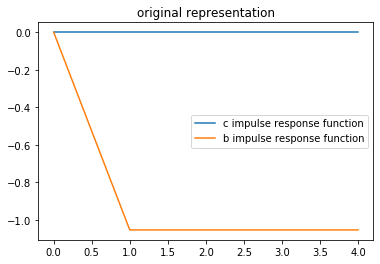

In [220]:
plt.title("original representation")
plt.plot(range(J), c_res1 / σϵ, label="c impulse response function")
plt.plot(range(J), b_res1 / σϵ, label="b impulse response function")
plt.legend()

The above two impulse response functions show that when the consumer has the information assumed in the original representation, his response to receiving a positive shock of $\epsilon_t$ is to leave his consumption unchanged and to
save the entire amount of his extra income and then forever roll over the extra bonds that he holds

To see this notice, that starting from next period on, his debt permanently  **decreases** by $\beta^{-1}$  


In [221]:
c_res2 / σa, b_res2 / σa

(array([0.0975, 0.0975, 0.0975, 0.0975, 0.0975]),
 array([ 0.  , -0.95, -0.95, -0.95, -0.95]))

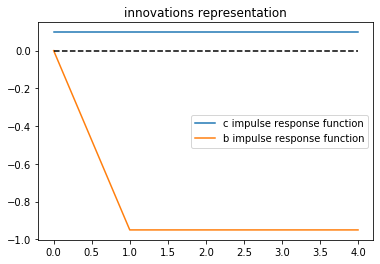

In [222]:
plt.title("innovations representation")
plt.plot(range(J), c_res2 / σa, label="c impulse response function")
plt.plot(range(J), b_res2 / σa, label="b impulse response function")
plt.plot([0, J-1], [0, 0], '--', color='k')
plt.legend()

The above impulse responses show that when the consumer has only the information that is assumed to be available under the innovations representation for $\{y_t\}$, he responds to a positive $a_t$ by permanently increasing his consumption. 

He accomplishes this by consuming a fraction $(1 - \beta^2)$  of the increment $a_t$ to his nonfinancial income and saving the rest in order to lower $b_{t+1}$ to finance the permanent increment in his consumption.

Now let's simulate some paths of consumption and debt for our two types of consumers


In [223]:
# set time length for simulation
T = 100

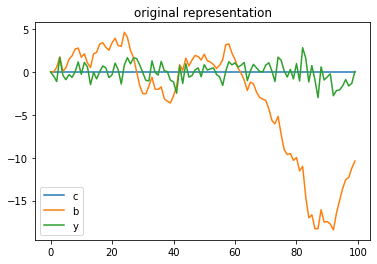

In [224]:
x1, y1 = LSS1.simulate(ts_length=T)
plt.plot(range(T), y1[0, :], label="c")
plt.plot(range(T), x1[2, :], label="b")
plt.plot(range(T), x1[0, :], label="y")
plt.title("original representation")
plt.legend()

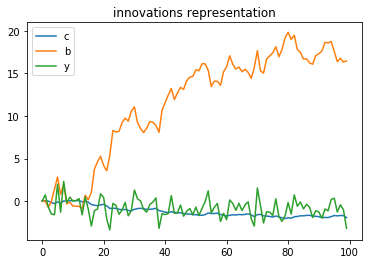

In [225]:
x2, y2 = LSS2.simulate(ts_length=T)
plt.plot(range(T), y2[0, :], label="c")
plt.plot(range(T), x2[2, :], label="b")
plt.plot(range(T), x2[0, :], label="y")
plt.title("innovations representation")
plt.legend()

## Simulating the income process and  two associated shock processes



We now describe how we form  a **single** $\{y_t\}_{t=0}^T $ realization that we will use to simulate the two different decision rules associated with our two types of consumer.

We accomplish this in the following steps.

1. We form a $y_t, \epsilon_t$ realization by drawing a long
simulation of $\{\epsilon_t\}_{t=0}^T$ where $T$ is a big integer $\epsilon_t =
\sigma_\epsilon v_t$, $v_t$ is a standard normal scalar,
$y_0 =100$,
and

$$ y_{t+1} - y_t =-\beta^{-1} \epsilon_t + \epsilon_{t+1} . $$

2.  We take the **same** $\{y_t\}$ realization generated in step 1 and form an innovation process $\{a_t\}$ from the formulas

\begin{align} a_0 & = 0 \cr 
a_t & = \sum_{j=0}^{t-1} \beta^j (y_{t-j} - y_{t-j-1}) + \beta^t a_0, \quad t \geq 1 \end{align}

3. We throw away the first $S$ observations and form the sample $\{y_t, \epsilon_t, a_t\}_{S+1}^T$ as the realization that we'll use in the following steps.

4. We  use the step 3 realization to **evaluate** and **simulate** the decision rules for $c_t, b_t$ that Python has  computed for us above. 

The above steps implement the experiment of comparing decisions made by two consumers having **identical** incomes at each date but  at each date having **different** information about their future incomes. 



### Values functions


After doing this, we compute the discounted expected values obtained for the two consumers by using the pairs
$P, d$ that we have computed for the value functions.

We compute the value functions $x_t' P x_t + d$ (I might have a sign off here!) for the two $P,d$ pairs at the **same** dates along the income  simulation. But we choose the states for two hypothetical consumer in the following peculiar way.

We give each consumer the same income $y_t$ and the pertinent shock $a_t$ or $\epsilon_t$, depending on whether it
is the "innovation representation" or the "orginal representation" consumer.

But we give **both** of these hypothetical consumers the $b_t$ of the "innovation representation" consumer.  We then record the discounted present values for these two.

Thus, the **state** vectors $x_t$ are different for the two consumers **only**  because one sees $a_t$ while the other (better informed) consumer sees $\epsilon_t$ -- they both have the same $b_t$, namely, that of the "innovations representation" consumer. 

  

In [226]:
S, T = 10, 100

ν_seq = np.random.normal(size=T+1)
ϵ_seq = σϵ * ν_seq

y_seq = np.empty(T+1)
y_seq[0] = 100 # initial state
for i in range(T):
    y_seq[i+1] = y_seq[i] + ϵ_seq[i+1] - ϵ_seq[i] /  β

In [227]:
# calculate innovations
a_seq = np.zeros(T+1)
for i in range(1, T+1):
    a_seq[i] += β ** i * a_seq[0]
    for j in range(i):
        a_seq[i] += β ** j * (y_seq[i-j] - y_seq[i-j-1])

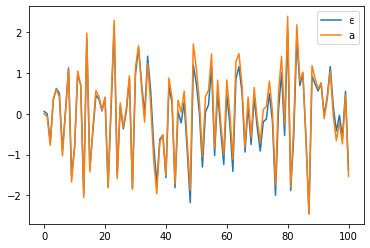

In [228]:
plt.plot(range(T+1), ϵ_seq, label="ϵ")
plt.plot(range(T+1), a_seq, label="a")
plt.legend()

Here we confirm that the constructed innovations generate the same income sequence.

In [229]:
ya_seq = np.empty(T+1)
ya_seq[0] = 100 # initial state
for i in range(T):
    ya_seq[i+1] = ya_seq[i] + a_seq[i+1] - β * a_seq[i]
    
np.max(np.abs(ya_seq - y_seq)) < 1e-10

True

#### Calculating  innovations in another way

Here we use formula (3) above to compute $a_{t+1}$ as a function of the history $\epsilon_{t+1}, \epsilon_t, \epsilon_{t-1}, \ldots$

Thus, we compute




$$
\begin{aligned}
a_{t+1}	&=\beta a_{t}+\epsilon_{t+1}-\beta^{-1}\epsilon_{t} \\
	&=\beta\left(\beta a_{t-1}+\epsilon_{t}-\beta^{-1}\epsilon_{t-1}\right)+\epsilon_{t+1}-\beta^{-1}\epsilon_{t} \\
	&=\beta^{2}a_{t-1}+\beta\left(\epsilon_{t}-\beta^{-1}\epsilon_{t-1}\right)+\epsilon_{t+1}-\beta^{-1}\epsilon_{t} \\
	&=\cdots \\
	&=\beta^{t+1}a_{0}+\sum_{j=0}^{t}\beta^{j}\left(\epsilon_{t+1-j}-\beta^{-1}\epsilon_{t-j}\right) \\
	&=\beta^{t+1}a_{0}+\epsilon_{t+1}+\left(\beta-\beta^{-1}\right)\sum_{j=0}^{t-1}\beta^{j}\epsilon_{t-j}-\beta^{t-1}\epsilon_{0}.
\end{aligned}
$$

We then verify that we recover the same $\{a_t\}$ sequence computed earlier.

In [230]:
a_seq2 = np.zeros(T+1)
for i in range(T):
    a_seq2[i+1] += β ** (i + 1) * a_seq2[0] + ϵ_seq[i+1] - β ** (i - 1) * ϵ_seq[0]
    for j in range(i):
        a_seq2[i+1] += (β - 1 / β) * β ** j * ϵ_seq[i-j]

In [231]:
np.max(np.abs(a_seq2 - a_seq)) < 1e-12

True

Now let's take two consumers with exactly the **same** $\{y_t\}$ sequence and construct paths of  $c_t$ and $b_t$ for our two types of consumers
who are distinguished not by their histories of current and past $y_t$'s but rather by whether or note they see the valuable **news** $a_t$.

In [232]:
# set the initial state
c1 = np.empty(T-S)
b1 = np.empty(T-S)
c2 = np.empty(T-S)
b2 = np.empty(T-S)

# initial debt
b1[0] = 0
b2[0] = 0

for i in range(T-S-1):

    # orginal representation
    c1[i] = y_seq[S+i+1] - ϵ_seq[S+i+1] - (1 - β) * b1[i]
    b1[i+1] = b1[i] - ϵ_seq[S+i+1] / β
    
    # innovations representation
    c2[i] = y_seq[S+i+1] - β ** 2 * a_seq[S+i+1] - (1 - β) * b2[i]
    b2[i+1] = b2[i] - β * a_seq[S+i+1]

c1[T-S-1] = y_seq[T] - ϵ_seq[T] - (1 - β) * b1[T-S-1]
c2[T-S-1] = y_seq[T] - β ** 2 * a_seq[T] - (1 - β) * b2[T-S-1]

(97.5581182952526, 102.68900055363287)

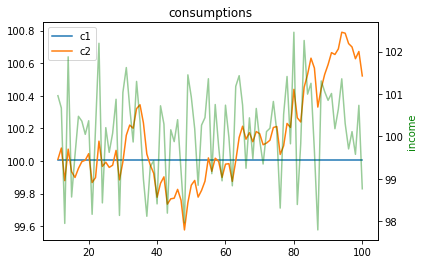

In [233]:
fig, ax = plt.subplots()

ax.plot(range(S+1, T+1), c1, label="c1")
ax.plot(range(S+1, T+1), c2, label="c2")
ax.legend()
ax.set_title("consumptions");

ax1_ = ax.twinx()
ax1_.plot(range(S+1, T+1), y_seq[S+1:], color='g', label="income", alpha=0.4)
ax1_.set_ylabel("income", color='g')
span = (max(y_seq[S+1:]) - min(y_seq[S+1:])) / 2
center = (max(y_seq[S+1:]) + min(y_seq[S+1:])) / 2
ax1_.set_ylim(center-span*1.1, center+span*1.1)

(97.5581182952526, 102.68900055363287)

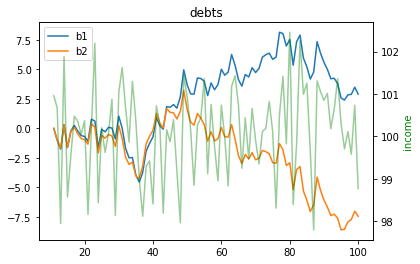

In [234]:
fig, ax = plt.subplots()

ax.plot(range(S+1, T+1), b1, label="b1")
ax.plot(range(S+1, T+1), b2, label="b2")
ax.legend()
ax.set_title("debts")

ax1_ = ax.twinx()
ax1_.plot(range(S+1, T+1), y_seq[S+1:], color='g', label="income", alpha=0.4)
ax1_.set_ylabel("income", color='g')
span = (max(y_seq[S+1:]) - min(y_seq[S+1:])) / 2
center = (max(y_seq[S+1:]) + min(y_seq[S+1:])) / 2
ax1_.set_ylim(center-span*1.1, center+span*1.1)

Now let us compute the discounted expected values.

In [235]:
P1

array([[ 20.  , -20.  ,  -1.  ],
       [-20.  ,  20.  ,   1.  ],
       [ -1.  ,   1.  ,   0.05]])

In [236]:
P2

array([[ 20.      , -18.05    ,  -1.      ],
       [-18.05    ,  16.290125,   0.9025  ],
       [ -1.      ,   0.9025  ,   0.05    ]])

In [237]:
# construct state vectors
x1 = np.empty((3, T-S))
x1[0, :] = y_seq[S+1:]
x1[1, :] = ϵ_seq[S+1:]
# use debt of "innovation representation" consumer
x1[2, :] = b2[:]

x2 = np.empty((3, T-S))
x2[0, :] = y_seq[S+1:]
x2[1, :] = a_seq[S+1:]
x2[2, :] = b2[:]

# compute discounted present values
ev1 = np.diagonal(x1.T @ P1 @ x1) + d1
ev2 = np.diagonal(x2.T @ P2 @ x2) + d2

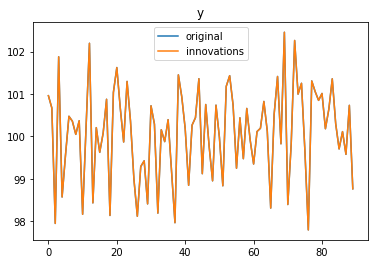

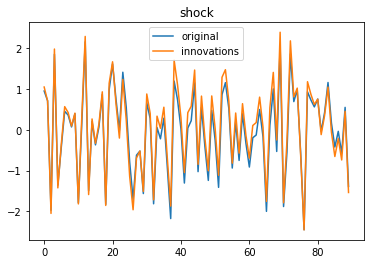

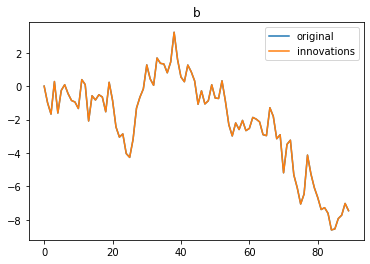

In [238]:
# double check that state sequences are well prepared
var_names = ['y', 'shock', 'b']
for i, var_name in enumerate(var_names):
    plt.plot(range(T-S), x1[i, :], label="original")
    plt.plot(range(T-S), x2[i, :], label="innovations")
    plt.title(f"{var_name}")
    plt.legend()
    plt.show()

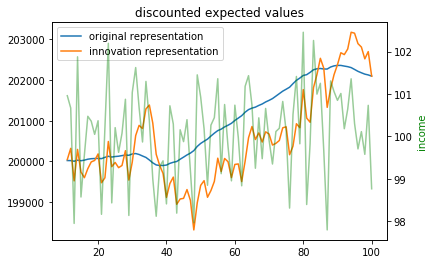

In [239]:
fig, ax = plt.subplots()

ax.plot(range(S+1, T+1), ev1, label="original representation")
ax.plot(range(S+1, T+1), ev2, label="innovation representation")
ax.legend()
ax.set_title("discounted expected values")

ax1_ = ax.twinx()
ax1_.plot(range(S+1, T+1), y_seq[S+1:], color='g', label="income", alpha=0.4)
ax1_.set_ylabel("income", color='g')
span = (max(y_seq[S+1:]) - min(y_seq[S+1:])) / 2
center = (max(y_seq[S+1:]) + min(y_seq[S+1:])) / 2
ax1_.set_ylim(center-span*1.1, center+span*1.1);

## Stop here -- the remaining cells are things to be deleted or edited

## Zejin Nov 21 Consider the expected total wealth in each state

For “original representation” consumers, given $y_{t}$, $\epsilon_{t}$, and $b_{t}$:

$$
\begin{aligned}
\sum_{j=0}^{\infty}\beta^{j}E_{t}\left[y_{t+j}\right]-b_{t}	&=y_{t}+\sum_{j=1}^{\infty}\beta^{j}E_{t}\left[y_{t+j}\right]-b_{t} \\
	&=y_{t}+\sum_{j=1}^{\infty}\beta^{j}\left(y_{t}-\beta^{-1}\epsilon_{t}\right)-b_{t} \\
	&=\sum_{j=0}^{\infty}\left(y_{t}-\epsilon_{t}\right)-b_{t} \\
	&=\frac{y_{t}}{1-\beta}-\frac{\epsilon_{t}}{1-\beta}-b_{t}. 
\end{aligned}
$$

For “innovations representation” consumers, given $y_{t}$, $a_{t}$, and $b_{t}$:

$$
\begin{aligned}
\sum_{j=0}^{\infty}\beta^{j}E_{t}\left[y_{t+j}\right]-b_{t}	&=y_{t}+\sum_{j=1}^{\infty}\beta^{j}E_{t}\left[y_{t+j}\right]-b_{t} \\
	&=y_{t}+\sum_{j=1}^{\infty}\beta^{j}\left(y_{t}-\beta a_{t}\right)-b_{t} \\
	&=\sum_{j=0}^{\infty}y_{t}-\sum_{j=0}^{\infty}\beta^{2}a_{t}-b_{t} \\
	&=\frac{y_{t}}{1-\beta}-\frac{\beta^{2}a_{t}}{1-\beta}-b_{t}.
\end{aligned}
$$

In [240]:
ew1 = x1[0, :] / (1 - β) - x1[1, :] / (1 - β) - x1[2, :]
ew2 = x2[0, :] / (1 - β) - β ** 2 * x2[1, :] / (1 - β) - x2[2, :]

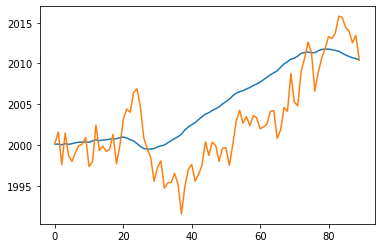

In [241]:
plt.plot(range(T-S), ew1)
plt.plot(range(T-S), ew2)

## Zejin Nov 21: try to simulate consumption with the same debts

In [242]:
# set the initial state
c1_hypo = np.empty(T-S)

for i in range(T-S):

    # orginal representation
    c1_hypo[i] = y_seq[S+i+1] - ϵ_seq[S+i+1] - (1 - β) * b2[i]

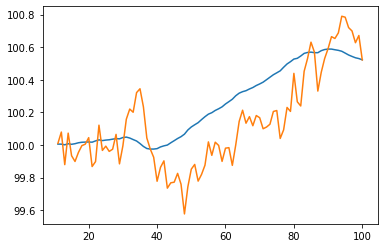

In [243]:
plt.plot(range(S+1, T+1), c1_hypo, label="original representation")
plt.plot(range(S+1, T+1), c2, label="innovation representation")

## compare consumptions, expected discounted wealth, and expected utility (resized)

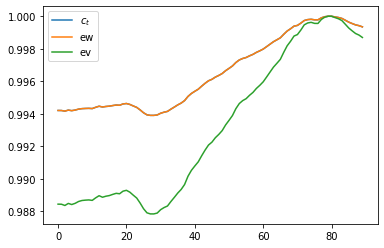

In [244]:
plt.plot(range(T-S), c1_hypo / c1_hypo.max(), label='$c_t$')
plt.plot(range(T-S), ew1 / ew1.max(), label='ew')
plt.plot(range(T-S), ev1 / ev1.max(), label='ev')
plt.legend()

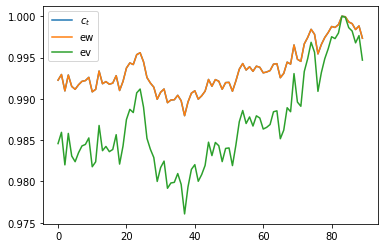

In [245]:
plt.plot(range(T-S), c2 / c2.max(), label='$c_t$')
plt.plot(range(T-S), ew2 / ew2.max(), label='ew')
plt.plot(range(T-S), ev2 / ev2.max(), label='ev')
plt.legend()

In [246]:
# construct b1 so that two types of consumers have the same expected discounted wealth
x1_hypo = x1.copy()

x1_hypo[2, :] = x1[0, :] / (1 - β) - x1[1, :] / (1 - β) - ew2
ev1_hypo = np.diagonal(x1_hypo.T @ P1 @ x1_hypo) + d1

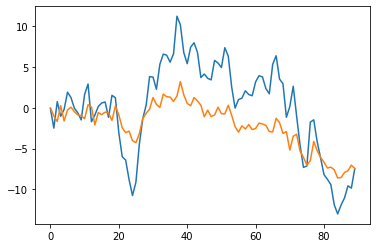

In [247]:
plt.plot(range(T-S), x1_hypo[2, :], label="original")
plt.plot(range(T-S), x2[2, :], label="innovations")

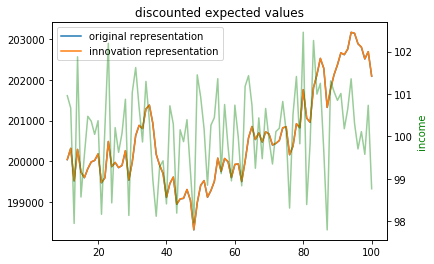

In [248]:
fig, ax = plt.subplots()

ax.plot(range(S+1, T+1), ev1_hypo, label="original representation")
ax.plot(range(S+1, T+1), ev2, label="innovation representation")
ax.legend()
ax.set_title("discounted expected values")

ax1_ = ax.twinx()
ax1_.plot(range(S+1, T+1), y_seq[S+1:], color='g', label="income", alpha=0.4)
ax1_.set_ylabel("income", color='g')
span = (max(y_seq[S+1:]) - min(y_seq[S+1:])) / 2
center = (max(y_seq[S+1:]) + min(y_seq[S+1:])) / 2
ax1_.set_ylim(center-span*1.1, center+span*1.1);

In [249]:
# the gain of information
ev1_hypo - ev2

array([-4.00263158, -4.00263158, -4.00263158, -4.00263158, -4.00263158,
       -4.00263158, -4.00263158, -4.00263158, -4.00263158, -4.00263158,
       -4.00263158, -4.00263158, -4.00263158, -4.00263158, -4.00263158,
       -4.00263158, -4.00263158, -4.00263158, -4.00263158, -4.00263158,
       -4.00263158, -4.00263158, -4.00263158, -4.00263158, -4.00263158,
       -4.00263158, -4.00263158, -4.00263158, -4.00263158, -4.00263158,
       -4.00263158, -4.00263158, -4.00263158, -4.00263158, -4.00263158,
       -4.00263158, -4.00263158, -4.00263158, -4.00263158, -4.00263158,
       -4.00263158, -4.00263158, -4.00263158, -4.00263158, -4.00263158,
       -4.00263158, -4.00263158, -4.00263158, -4.00263158, -4.00263158,
       -4.00263158, -4.00263158, -4.00263158, -4.00263158, -4.00263158,
       -4.00263158, -4.00263158, -4.00263158, -4.00263158, -4.00263158,
       -4.00263158, -4.00263158, -4.00263158, -4.00263158, -4.00263158,
       -4.00263158, -4.00263158, -4.00263158, -4.00263158, -4.00

## more income does not make consumers worse off?

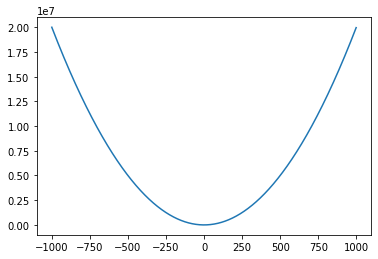

In [250]:
y_seq = np.arange(-1000, 1000)
plt.plot(y_seq, [np.array([y, 0, 0]) @ P1 @ np.array([y, 0, 0]) + d1 for y in y_seq])

In [251]:
# the initial state
# the last entry is the initial state of debt
x0 = np.array([10, 0, 0])

print(- x0 @ P1 @ x0 - d1, - x0 @ P2 @ x0 - d2)

-2000.0000000003936 -2004.002631579302


#### Equation numbering from Zejin

Hi Tom, if you want to modify the ipython notebook directly, you would need to add HTML tags. For example, you may check the sourse code of the following equation by double-clicking this cell, and do copying and pasting.

<a id='equation-equation_name'></a>
<table width=100%><tr style='background-color: #FFFFFF !important;'>
<td width=10%></td>
<td width=80%>
$$
\text{equation here}
$$
</td><td width=10% style='text-align:center !important;'>
(1)
</td></tr></table>

If you want to use equation numbers when you construct .rst files, it would be much simpler. You can use the `label` tag:

```
.. math::
    :label: equation_name

    E_0 \sum_{t=0}^\infty \beta^t u(c_t)
```

and then you can use `eq` to refer to it: "the consumer maximizes :eq:\`equation_name\` by choosing a consumption..."

The following cell evaluates optimal values (maximized expected sum of utilities) at the initial condition.

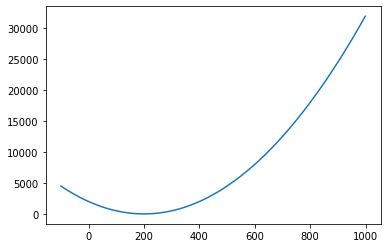

In [252]:
a_seq = np.arange(-100, 1000)
plt.plot(a_seq, [np.array([10, 0, a]) @ P1 @ np.array([10, 0, a]) + d1 for a in a_seq])
